# ADMIXTURE

* En `./dataset_dumps/` están los archivos `.samples` con los sample IDs de 1000 Genomas para cada dataset (`L`, `LE`, `LEA` ...). En `../1000Genomes/galanter_beds` están los archivos (`.bed`, `.bim` ...) de PLINK de cada panel (GALs y CPs).
* Copié tanto los `.samples` como los bedfiles a `~/tesina/admixture` (con `./0_bring_the_panel_bedfiles.sh`) y corrí `1_create_datasets_run_admixture.sh panel_label_1 panel_label_2 ..`. Se crean automáticamente directorios por cada combineta de dataset + panel con los archivos `.P` y `.Q`
* Finalmente corrí `2_generate_CV_errors`.

## CV Errors

### Plot the CV errors per dataset / per panel

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from plotters.admixture_cv_errors import AdmixtureCVErrors


sns.set_context("notebook")
sns.set_style("white")

admixture_cv_errors = AdmixtureCVErrors()
cv_errors = admixture_cv_errors.read_cv_errors()

idx = pd.IndexSlice
gal_panels_cv_error = cv_errors.loc[idx[:, ["GAL_Completo", "GAL_Affy", "GAL_Faltantes"]], :]
cp_panels_cv_error = cv_errors.loc[idx[:, ["CPx1", "CPx10", "CPx100"]], :]

In [35]:
min_errors = cv_errors.groupby(level=["dataset", "panel"]).idxmin()
min_errors = min_errors.applymap(lambda ix: ix[-1])
min_errors["n_continents"] = min_errors.index.get_level_values("dataset").map(len)
min_errors = min_errors[["n_continents", "CV_error"]]
min_errors.columns = ["Number of continents", "Value of $K$ at min cv-error"]
min_errors


Number of continents  Value of $K$ at min cv-error
dataset panel                                                            
L       CPx1                              1                             2
        CPx10                             1                             2
        CPx100                            1                             2
        GAL_Affy                          1                             3
        GAL_Completo                      1                             3
        GAL_Faltantes                     1                             3
LE      CPx1                              2                             2
        CPx10                             2                             3
        CPx100                            2                             3
        GAL_Affy                          2                             3
        GAL_Completo                      2                             3
        GAL_Faltantes                     2                             3
LEA     CPx1                              3                             3
        CPx10                             3                             3
        CPx100                            3                             3
        GAL_Affy                          3                             3
        GAL_Completo                      3                             3
        GAL_Faltantes                     3                             3
LEAC    CPx1                              4                             4
        CPx10                             4                             4
        CPx100                            4                             4
        GAL_Affy                          4                             4
        GAL_Completo                      4                             4
        GAL_Faltantes                     4                             4
LEACI   CPx1                              5                             5
        CPx10                             5                             5
        CPx100                            5                             5
        GAL_Affy                          5                             5
        GAL_Completo                      5                             5
        GAL_Faltantes                     5                             5

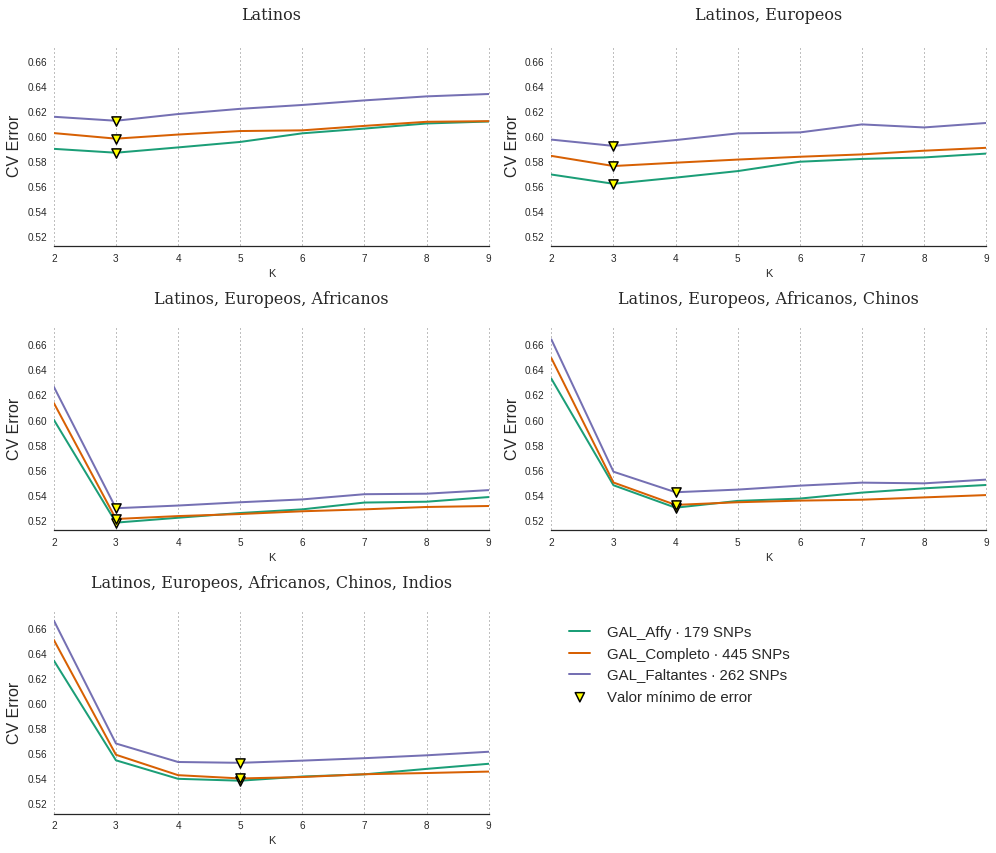

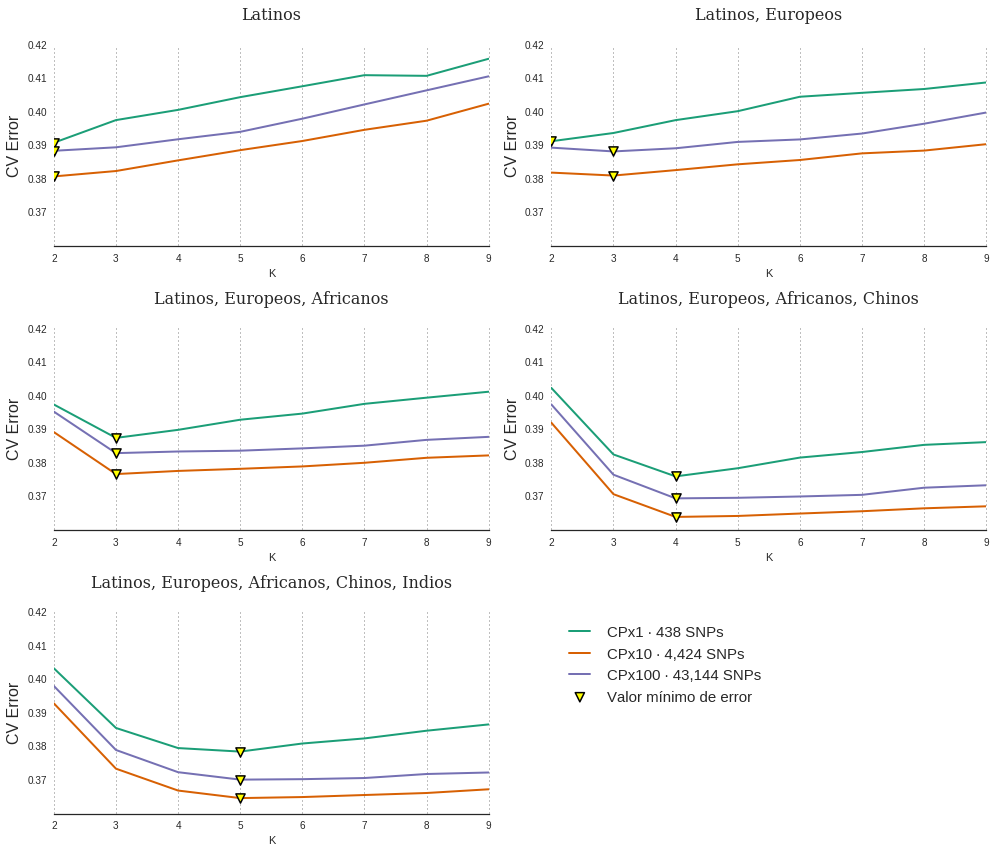

In [3]:
labels = ["CV_errors_GAL", "CV_errors_CPx"]
panel_groups = [gal_panels_cv_error, cp_panels_cv_error]

for filename, panel_group in zip(labels, panel_groups):
    admixture_cv_errors.plot(filename, panel_group)
    plt.show()

## Ancestry ratios per population (mean) and per individual sample

In [37]:
%%time

from admixture.results import AdmixtureResults

admix_results = AdmixtureResults()
ancestries_df = admix_results.read_ancestry_files()

CPU times: user 16.8 s, sys: 164 ms, total: 17 s
Wall time: 17.8 s


/home/juan/repos/tesina/plotters/admixture_ancestries.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_lite = ancestries_df.loc[dataset_label, K, panel_label].dropna(axis=1)
/home/juan/repos/tesina/plotters/admixture_ancestries.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  


             AMR   EUR   AFR   EAS   SAS     2     5     7   SUM
population                                                      
PEL         0.81  0.08  0.02  0.01  0.01  0.06  0.01  0.01  1.01
MXL         0.49  0.17  0.01  0.03  0.02  0.24  0.02  0.01  0.99
CLM         0.28  0.21  0.04  0.01  0.01  0.41  0.02  0.01  0.99
PUR         0.14  0.08  0.07  0.01  0.02  0.64  0.03  0.02  1.01
IBS         0.00  0.64  0.00  0.00  0.01  0.34  0.00  0.01  1.00
GBR         0.00  0.97  0.00  0.00  0.01  0.01  0.00  0.01  1.00
YRI         0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00
LWK         0.00  0.00  0.05  0.00  0.00  0.00  0.95  0.00  1.00
CHB         0.00  0.00  0.00  0.99  0.00  0.00  0.00  0.00  0.99
CHS         0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  1.00
GIH         0.00  0.04  0.00  0.01  0.88  0.00  0.00  0.07  1.00


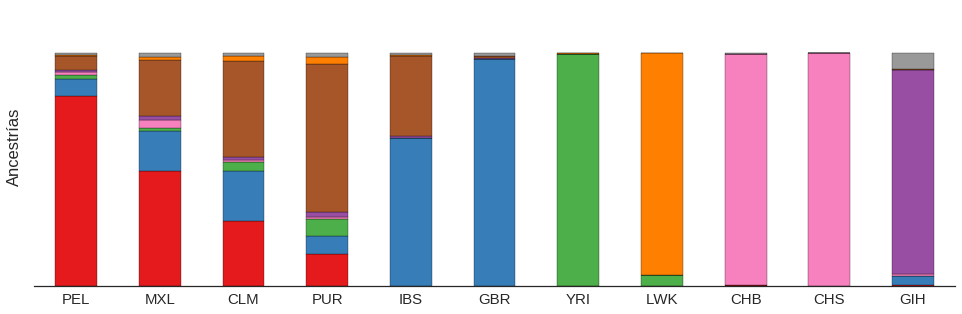

             AMR   EUR   AFR   EAS   SAS     0     2     5   SUM
population                                                      
PEL         0.73  0.06  0.03  0.03  0.03  0.03  0.05  0.04  1.00
MXL         0.45  0.18  0.04  0.04  0.05  0.04  0.14  0.06  1.00
CLM         0.24  0.30  0.09  0.04  0.06  0.04  0.17  0.07  1.01
PUR         0.12  0.32  0.14  0.03  0.05  0.04  0.23  0.07  1.00
IBS         0.01  0.51  0.03  0.01  0.05  0.04  0.26  0.10  1.01
GBR         0.01  0.53  0.01  0.02  0.06  0.04  0.24  0.09  1.00
YRI         0.01  0.00  0.96  0.00  0.00  0.01  0.00  0.01  0.99
LWK         0.00  0.01  0.93  0.00  0.01  0.02  0.01  0.02  1.00
CHB         0.07  0.02  0.02  0.71  0.03  0.11  0.01  0.04  1.01
CHS         0.06  0.01  0.02  0.72  0.02  0.13  0.01  0.03  1.00
GIH         0.02  0.13  0.01  0.03  0.46  0.18  0.09  0.08  1.00


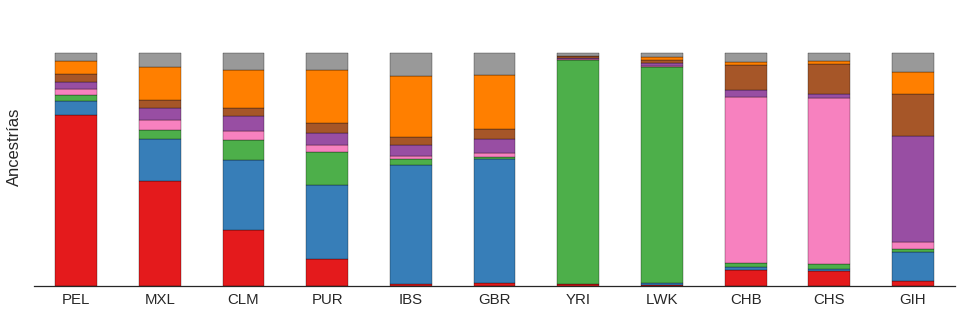

CPU times: user 1min 25s, sys: 3.11 s, total: 1min 28s
Wall time: 1min 25s


In [56]:
%%time

import seaborn as sns
from plotters.admixture_ancestries import AdmixtureAncestries

sns.set_context("notebook", font_scale=1.5)
sns.set_style("white")

admix_plotter = AdmixtureAncestries()

# # Replot and show specific cases
params = [("LEACI", 8, "CPx100"),
          ("LEACI", 8, "GAL_Completo")]

for dKp in params:
    admix_plotter.plot_per_sample(*dKp, ancestries_df, title_on=False)
    admix_plotter.plot_population_means(*dKp, ancestries_df,
                                        legend_on=False, title_on=False)

# # Rerun this line if you want to replot everything
# admix_plotter.plot_all(ancestries_df)

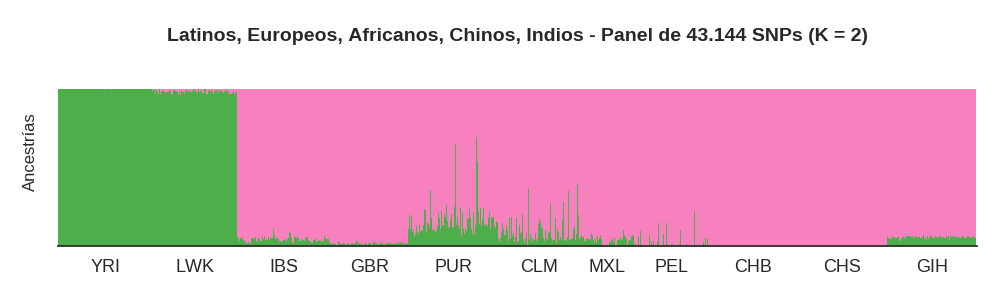

In [13]:
from IPython.display import Image
from os.path import join

panel, dataset, K = "CPx100", "LEACI", 2
filedir = "/home/juan/tesina/charts/ADMIXTURE/"
filename = "{0}__{1}/{1}__{0}__{2}".format(panel, dataset, K)

Image(join(filedir, filename + "__samples.png"))

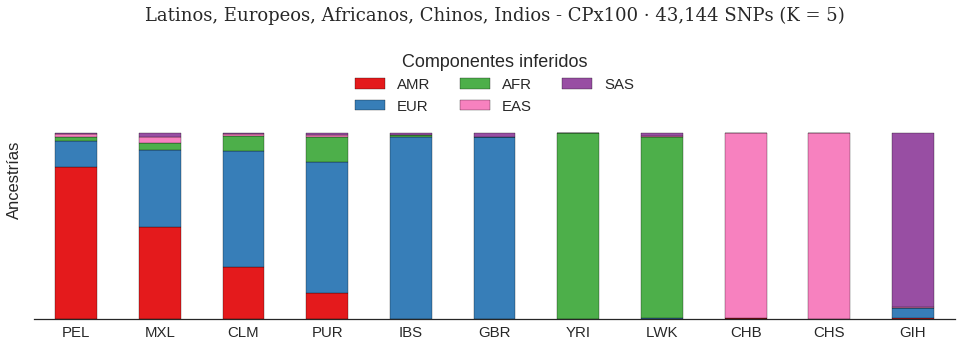

In [9]:
Image(join(filedir, filename + "__means.png"))

# Ternary plots

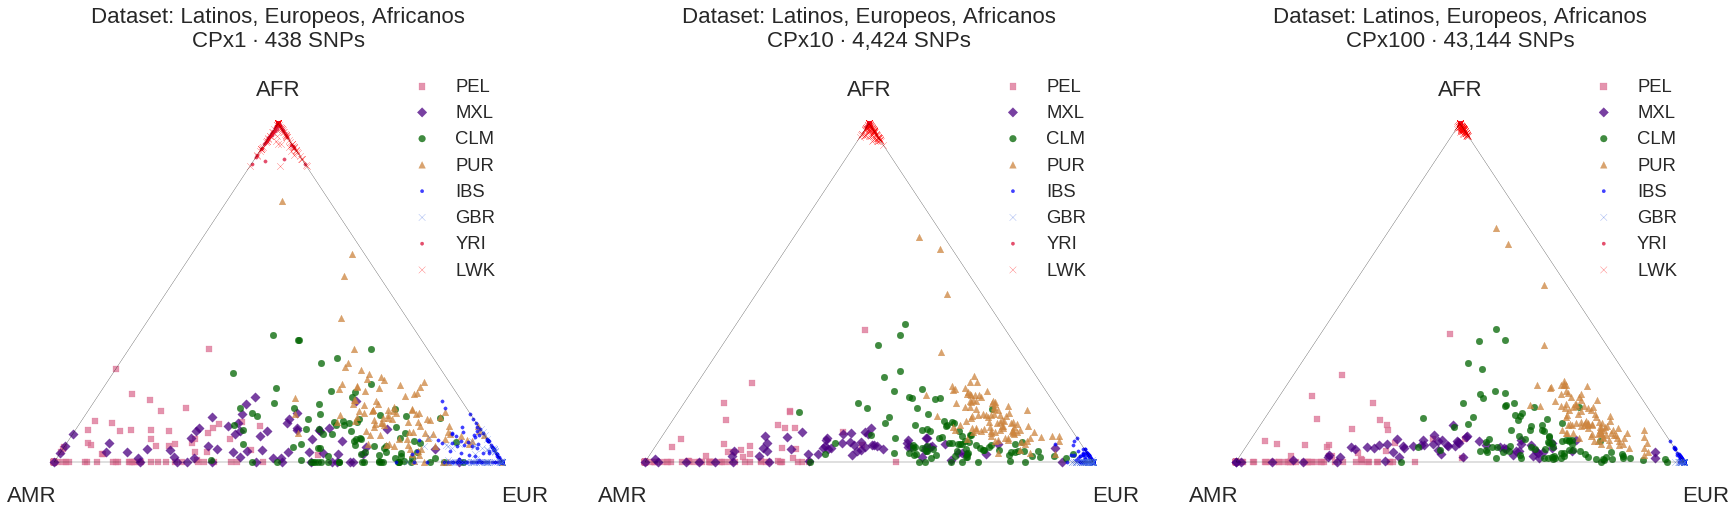

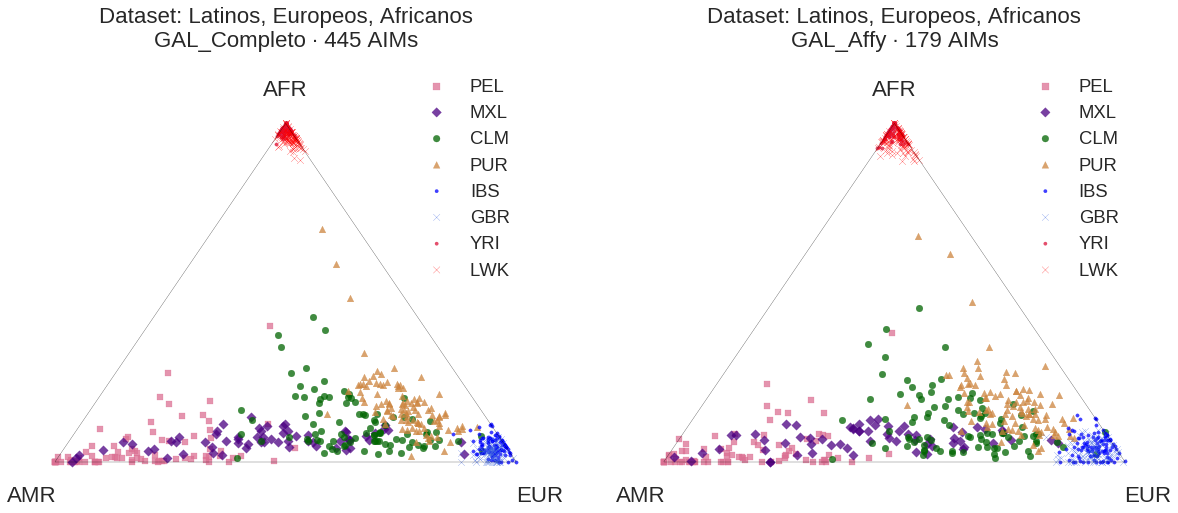

In [47]:
import pandas as pd
import seaborn as sns

from components.panel import Panel
from components.dataset import Dataset
from plotters.ancestries_triangle_plotter import AncestriesTrianglePlotter


sns.set_context("notebook", font_scale=1.85)
sns.set_style("white")


triangle_plotter = AncestriesTrianglePlotter()
idx = pd.IndexSlice
dataset = Dataset("LEA")

panels = Panel.panel_groups()

for panel_group_label, panel_group in panels.items():
    if panel_group_label == "subpanels":
        continue
    if panel_group_label == "panels":
        panel_group = [p for p in panel_group if not "Faltantes" in p.label]

    panel_labels = [panel.label for panel in panel_group]
    
    # Choose the dataset / panels to plot
    df = ancestries_df.sort_index().loc[idx[dataset.label, 3, panel_labels], :]   
    filename = "ternary_plot_of_ancestries__{}_{}".format(dataset.label, panel_group_label)
    triangle_plotter.plot(filename, panel_group, df)